# [Prediction in HRM research](https://onlinelibrary.wiley.com/doi/full/10.1111/1748-8583.12400)

Replication of
[github repository](https://github.com/NicholasDanks/Prediction%2Din%2DHRM%2Dresearch) 

In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATASET: [ISSP 2015 - "Work Orientations IV"](https://www.gesis.org/en/issp/data-and-documentation/work-orientations/2015)

In [545]:
data_df = pd.read_stata("data/ZA6770_v2-1-0.dta", convert_categoricals=False)
print(f"shape: {data_df.shape}")
data_df.head()

data_df.to_csv("2015 ISSP data.csv", index=False)

shape: (51668, 442)


In [521]:
for col in data_df.columns:
    print(col)

studyno
version
doi
c_sample
country
c_alphan
v1
v2
v3
v4
v5
v6
v7
v8
v9
v10
v11
v12
v13
v14
v15
V16
v17
v18
v19
v20
v21
v22
v23
v24
v25
v26
v27
v28
v29
v30
v31
v32
v33
v34
v35
v36
v37
v38
v39
v40
v41
v42
v43
v44
v45
v46
v47
v48
v49
v50
v51
v52
v53
v54
v55
v56
v57
v58
v59
v60
v61
v62
v63
v64
v65
v66
v67
v68
v69
v70
v71
v72
v73
v74
v75
v76
v77
v78
v79
v80
v81
v82
v83
v84
v85
v86
v87
v88
v89
v90
v91
v92
v93
v94
v95
v96
v97
SEX
BIRTH
AGE
DK_AGE
EDUCYRS
AT_DEGR
AU_DEGR
BE_DEGR
CH_DEGR
CL_DEGR
CN_DEGR
CZ_DEGR
DE_DEGR
DK_DEGR
EE_DEGR
ES_DEGR
FI_DEGR
FR_DEGR
GB_DEGR
GE_DEGR
HR_DEGR
HU_DEGR
IL_DEGR
IN_DEGR
IS_DEGR
JP_DEGR
LT_DEGR
LV_DEGR
MX_DEGR
NO_DEGR
NZ_DEGR
PH_DEGR
PL_DEGR
RU_DEGR
SE_DEGR
SI_DEGR
SK_DEGR
SR_DEGR
TW_DEGR
US_DEGR
VE_DEGR
ZA_DEGR
DEGREE
WORK
WRKHRS
EMPREL
NEMPLOY
WRKSUP
NSUP
TYPORG1
TYPORG2
ISCO08
MAINSTAT
PARTLIV
SPWORK
SPWRKHRS
SPEMPREL
SPWRKSUP
SPISCO08
SPMAINST
UNION
AT_RELIG
AU_RELIG
BE_RELIG
CH_RELIG
CL_RELIG
CN_RELIG
CZ_RELIG
DE_RELIG
DK_RELIG
EE_RELIG
ES_RELIG
FI_RELI

## SAV Data Labels

In [522]:
import pyreadstat
df, meta = pyreadstat.read_sav("data/ZA6770_v2-1-0.sav")
for col, label in meta.column_names_to_labels.items():
    print(f"{col}: {label}")

studyno: GESIS Data Archive Study Number
version: GESIS Archive Version
doi: Digital Object Identifier
c_sample: Country/ Sample ISO 3166 Code (see country for codes for whole nation states)
country: Country ISO 3166 Code (see c_sample for codes for the sample)
c_alphan: Country Prefix ISO 3166
v1: Q1a Job is a way of earning money
v2: Q1b Enjoy a paid job even if I did not need money
v3: Q2a Personally important: job security
v4: Q2b Personally important: high income
v5: Q2c Personally important: opportunities for advancement
v6: Q2d Personally important: an interesting job
v7: Q2e Personally important: work independently
v8: Q2f Personally important: help other people
v9: Q2g Personally important: a job useful to society
v10: Q2h Personally important: decide time of work
v11: Q2i Personally important: contact with other people
v12: Q3 Give up job opportunities for benefit of family life
v13: Q4 Remain in not satisfying job for benefit of family life
v14: Q5 Past five years: discrimin

## Subset Data by Country

In [523]:
data_df = pd.read_stata("data/ZA6770_v2-1-0.dta", convert_categoricals=False)

# Filter for each country with country code
# 840 = USA, 392 = Japan, 276 = Germany
usa_data = data_df[data_df['country'] == 840]
jp_data = data_df[data_df['country'] == 392]
de_data = data_df[data_df['country'] == 276]

# Combine all
all_data = pd.concat([usa_data, jp_data, de_data])
all_data = all_data.dropna()

print("USA:", usa_data.shape)
print("Japan:", jp_data.shape)
print("Germany:", de_data.shape)
print("All:", all_data.shape)

USA: (1477, 442)
Japan: (1573, 442)
Germany: (1687, 442)
All: (4737, 442)


In [524]:
# Rename columns 
rename_dict = {
    'v44': 'job_sat',
    'SEX': 'sex',
    'AGE': 'Age',      
    'EDUCYRS': 'educyrs',
    'v23': 'income',           
    'v24': 'advancement',
    'v22': 'security',
    'v25': 'interesting',
    'v26': 'independent',
    'v42': 'rel_mgmt',
    'v43': 'rel_clgs'
}

usa_data = usa_data.rename(columns=rename_dict)
jp_data = jp_data.rename(columns=rename_dict)
de_data = de_data.rename(columns=rename_dict)
all_data = all_data.rename(columns=rename_dict)

In [525]:
# Rename and filter relevant columns
selected_cols = list(rename_dict.values()) # List of new column names after renaming
usa_data = usa_data.rename(columns=rename_dict)[selected_cols].dropna()
jp_data = jp_data.rename(columns=rename_dict)[selected_cols].dropna()
de_data = de_data.rename(columns=rename_dict)[selected_cols].dropna()
all_data = all_data.rename(columns=rename_dict)[selected_cols].dropna()

print("USA:", usa_data.shape)
print("Japan:", jp_data.shape)
print("Germany:", de_data.shape)
print("All:", all_data.shape)

USA: (1477, 11)
Japan: (1573, 11)
Germany: (1687, 11)
All: (4737, 11)


In [526]:
all_data.to_csv("2015 ISSP data.csv", index=False)

# Estimate Linear Models (Explanatory Power)

| R Variable    | Python Column |comments|
|---------------|------------------------|-|
| `job_sat`     | `v44`                  |Job satisfaction in scale of 0 to 9|
| `sex`         | `SEX`                  |Male = 1; Female = 2?|
| `Age_cat`     | `AGE` (create)     |categorize age before OLS regression|
| `educyrs`     | `EDUCYRS`              |Education I: years of schooling|
| `income`      | `v23`                  | my income is high|
| `advancement` | `v24`                  | opportunities for advancement are high|
| `security`    | `v22`                  | my job is secure|
| `interesting` | `v25`                  | my job is interesting|
| `independent` | `v26`                  | can work independently|
| `rel_mgmt`    | `v42`                  | Relations: between management and employees|
| `rel_clgs`    | `v43`                  | Relations: between workmates/ colleagues?|

lm_all <- lm(scale(job_sat) ~ factor(sex) + factor(Age_cat) + scale(educyrs) + scale(income) + scale(advancement) + scale(security) + scale(interesting) + scale(independent) + scale(rel_mgmt) + scale(rel_clgs), data = all_data)
summary(lm_all)


In [527]:
usa_data.head()

,job_sat,sex,Age,educyrs,income,advancement,security,interesting,independent,rel_mgmt,rel_clgs
46244,0,1,72,16,0,0,0,0,0,0,0
46245,3,2,55,18,5,4,1,3,2,2,1
46246,2,2,23,11,4,2,2,4,2,3,3
46247,0,1,71,14,0,0,0,0,0,0,0
46248,0,2,33,12,0,0,0,0,0,0,0


In [528]:
# Categorize age in groups
for df in [usa_data, jp_data, de_data, all_data]:
    df['Age_cat'] = pd.cut(df['Age'], bins=[0, 35, 49, float('inf')], labels=['≤35', '36–49', '≥50'], right=True)

### LINEAR REGRESSION

In [529]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale

# Define regression formula 
formula = (
    'scale(job_sat) ~ C(sex) + C(Age_cat) + scale(educyrs) + scale(income) + '
    'scale(advancement) + scale(security) + scale(interesting) + scale(independent) + scale(rel_mgmt) + scale(rel_clgs)'
)

In [530]:
# import statsmodels.formula.api as smf
# from sklearn.preprocessing import scale

# # scale job satisfaction (target variable)
# for df in [usa_data, jp_data, de_data, all_data]:
#     df['job_sat_scaled'] = scale(df['job_sat'])

# # scale predictors
# cols_to_scale = [
#     'educyrs', 'income', 'advancement', 'security',
#     'interesting', 'independent', 'rel_mgmt', 'rel_clgs'
# ]

# for df in [usa_data, jp_data, de_data, all_data]:
#     for col in cols_to_scale:
#         df[f'{col}_scaled'] = scale(df[col])


# # Define regression formula based on R formula
# formula = (
#     'job_sat_scaled ~ C(sex) + C(Age_cat) + '
#     'educyrs_scaled + income_scaled + advancement_scaled + security_scaled + '
#     'interesting_scaled + independent_scaled + rel_mgmt_scaled + rel_clgs_scaled'
# )

In [531]:
usa_data.head()

,job_sat,sex,Age,educyrs,income,advancement,security,interesting,independent,rel_mgmt,rel_clgs,Age_cat
46244,0,1,72,16,0,0,0,0,0,0,0,≥50
46245,3,2,55,18,5,4,1,3,2,2,1,≥50
46246,2,2,23,11,4,2,2,4,2,3,3,≤35
46247,0,1,71,14,0,0,0,0,0,0,0,≥50
46248,0,2,33,12,0,0,0,0,0,0,0,≤35


### USA

In [532]:
lm_usa = smf.ols(formula=formula, data=usa_data).fit()
print("USA R²:", lm_usa.rsquared)
print(lm_usa.summary())

USA R²: 0.7786965034001948
                            OLS Regression Results                            
Dep. Variable:         scale(job_sat)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        12:48:55   Log-Likelihood:                -981.95
No. Observations:                1477   AIC:                             1988.
Df Residuals:                    1465   BIC:                             2051.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Interce

### Japan

In [533]:
lm_jp = smf.ols(formula=formula, data=jp_data).fit()
print("Japan R²:", lm_jp.rsquared)
print(lm_jp.summary())

Japan R²: 0.7861702043189177
                            OLS Regression Results                            
Dep. Variable:         scale(job_sat)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     521.7
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        12:48:56   Log-Likelihood:                -1018.8
No. Observations:                1573   AIC:                             2062.
Df Residuals:                    1561   BIC:                             2126.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inter

### Germany

In [534]:
lm_de = smf.ols(formula=formula, data=de_data).fit()
print("Germany R²:", lm_de.rsquared)
print(lm_de.summary())



Germany R²: 0.7229875659052364
                            OLS Regression Results                            
Dep. Variable:         scale(job_sat)   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     397.4
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        12:48:56   Log-Likelihood:                -1311.0
No. Observations:                1687   AIC:                             2646.
Df Residuals:                    1675   BIC:                             2711.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Int

### All Model

In [535]:
lm_all = smf.ols(formula=formula, data=all_data).fit()
print("All Model R²:", lm_all.rsquared)
print(lm_all.summary())

All Model R²: 0.7655425485305581
                            OLS Regression Results                            
Dep. Variable:         scale(job_sat)   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1403.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        12:48:56   Log-Likelihood:                -3286.0
No. Observations:                4737   AIC:                             6596.
Df Residuals:                    4725   BIC:                             6674.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
I

# Cross-Validation (Predictive Power)

In [536]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

predictors = ['sex', 'Age_cat', 'educyrs', 'income', 'advancement', 'security', 'interesting', 'independent', 'rel_mgmt', 'rel_clgs']

# Prepare X and y (use only the columns in your model)
X_usa = usa_data[predictors]
y_usa = usa_data['job_sat']

# Convert categorical variables to dummies
X_usa = pd.get_dummies(X_usa, drop_first=True)

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()

# Cross-validated metrics
cv_mse = -cross_val_score(model, X_usa, y_usa, cv=kf, scoring='neg_mean_squared_error')
cv_mae = -cross_val_score(model, X_usa, y_usa, cv=kf, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X_usa, y_usa, cv=kf, scoring='r2')

print("USA Model 10-fold CV Results:")
print("Mean MSE:", np.mean(cv_mse))
print("Mean MAE:", np.mean(cv_mae))
print("Mean R²:", np.mean(cv_r2))

USA Model 10-fold CV Results:
Mean MSE: 0.6091340488912171
Mean MAE: 0.47281469863057185
Mean R²: 0.7685290306821715


In [537]:
# Germany
X_de = de_data[predictors]
y_de = de_data['job_sat']
X_de = pd.get_dummies(X_de, drop_first=True)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()
cv_mse_de = -cross_val_score(model, X_de, y_de, cv=kf, scoring='neg_mean_squared_error')
cv_mae_de = -cross_val_score(model, X_de, y_de, cv=kf, scoring='neg_mean_absolute_error')
cv_r2_de = cross_val_score(model, X_de, y_de, cv=kf, scoring='r2')
print("Germany Model 10-fold CV Results:")
print("Mean MSE:", np.mean(cv_mse_de))
print("Mean MAE:", np.mean(cv_mae_de))
print("Mean R²:", np.mean(cv_r2_de))

Germany Model 10-fold CV Results:
Mean MSE: 0.749472438475584
Mean MAE: 0.5406242722854088
Mean R²: 0.7055989685119769


In [538]:
# Japan
X_jp = jp_data[predictors]
y_jp = jp_data['job_sat']
X_jp = pd.get_dummies(X_jp, drop_first=True)
cv_mse_jp = -cross_val_score(model, X_jp, y_jp, cv=kf, scoring='neg_mean_squared_error')
cv_mae_jp = -cross_val_score(model, X_jp, y_jp, cv=kf, scoring='neg_mean_absolute_error')
cv_r2_jp = cross_val_score(model, X_jp, y_jp, cv=kf, scoring='r2')
print("\nJapan Model 10-fold CV Results:")
print("Mean MSE:", np.mean(cv_mse_jp))
print("Mean MAE:", np.mean(cv_mae_jp))
print("Mean R²:", np.mean(cv_r2_jp))



Japan Model 10-fold CV Results:
Mean MSE: 1.0303893723571083
Mean MAE: 0.6317761483508286
Mean R²: 0.7799628866712074


In [539]:
# All
X_all = all_data[predictors]
y_all = all_data['job_sat']
X_all = pd.get_dummies(X_all, drop_first=True)
cv_mse_all = -cross_val_score(model, X_all, y_all, cv=kf, scoring='neg_mean_squared_error')
cv_mae_all = -cross_val_score(model, X_all, y_all, cv=kf, scoring='neg_mean_absolute_error')
cv_r2_all = cross_val_score(model, X_all, y_all, cv=kf, scoring='r2')
print("\nAll Model 10-fold CV Results:")
print("Mean MSE:", np.mean(cv_mse_all))
print("Mean MAE:", np.mean(cv_mae_all))
print("Mean R²:", np.mean(cv_r2_all))


All Model 10-fold CV Results:
Mean MSE: 0.8091249327550585
Mean MAE: 0.5539449524646989
Mean R²: 0.7633563553315854


## Countries Predicting Each Other

In [540]:
usa_data = usa_data[usa_data['sex'].isin([1, 2])]
jp_data = jp_data[jp_data['sex'].isin([1, 2])]
de_data = de_data[de_data['sex'].isin([1, 2])]
all_data = all_data[all_data['sex'].isin([1, 2])]

print("USA:", usa_data.shape)
print("Japan:", jp_data.shape)
print("Germany:", de_data.shape)
print("All:", all_data.shape)

USA: (1477, 12)
Japan: (1573, 12)
Germany: (1687, 12)
All: (4737, 12)


In [541]:
# Helper: unscale predictions
def unscale(pred, y):
    # y: original target variable (e.g., usa_data['job_sat'])
    mean = y.mean()
    std = y.std()
    return pred * std + mean

# USA model predicting Japan
pred_jp = lm_usa.predict(jp_data)
unscaled_pred_jp = unscale(pred_jp, usa_data['job_sat'])
USA_japan_RMSE = np.sqrt(np.mean((jp_data['job_sat'] - unscaled_pred_jp) ** 2))
USA_japan_MAE = np.mean(np.abs(jp_data['job_sat'] - unscaled_pred_jp))

# USA model predicting Germany
pred_de = lm_usa.predict(de_data)
unscaled_pred_de = unscale(pred_de, usa_data['job_sat'])
USA_germany_RMSE = np.sqrt(np.mean((de_data['job_sat'] - unscaled_pred_de) ** 2))
USA_germany_MAE = np.mean(np.abs(de_data['job_sat'] - unscaled_pred_de))

# Germany model predicting Japan
pred_jp_de = lm_de.predict(jp_data)
unscaled_pred_jp_de = unscale(pred_jp_de, de_data['job_sat'])
DE_japan_RMSE = np.sqrt(np.mean((jp_data['job_sat'] - unscaled_pred_jp_de) ** 2))
DE_japan_MAE = np.mean(np.abs(jp_data['job_sat'] - unscaled_pred_jp_de))

# Germany model predicting USA
pred_usa_de = lm_de.predict(usa_data)
unscaled_pred_usa_de = unscale(pred_usa_de, de_data['job_sat'])
DE_USA_RMSE = np.sqrt(np.mean((usa_data['job_sat'] - unscaled_pred_usa_de) ** 2))
DE_USA_MAE = np.mean(np.abs(usa_data['job_sat'] - unscaled_pred_usa_de))

# Japan model predicting Germany
pred_de_jp = lm_jp.predict(de_data)
unscaled_pred_de_jp = unscale(pred_de_jp, jp_data['job_sat'])
JP_DE_RMSE = np.sqrt(np.mean((de_data['job_sat'] - unscaled_pred_de_jp) ** 2))
JP_DE_MAE = np.mean(np.abs(de_data['job_sat'] - unscaled_pred_de_jp))

# Japan model predicting USA
pred_usa_jp = lm_jp.predict(usa_data)
unscaled_pred_usa_jp = unscale(pred_usa_jp, jp_data['job_sat'])
JP_USA_RMSE = np.sqrt(np.mean((usa_data['job_sat'] - unscaled_pred_usa_jp) ** 2))
JP_USA_MAE = np.mean(np.abs(usa_data['job_sat'] - unscaled_pred_usa_jp))

print("USA->Japan RMSE:", USA_japan_RMSE, "MAE:", USA_japan_MAE)
print("USA->Germany RMSE:", USA_germany_RMSE, "MAE:", USA_germany_MAE)
print("Germany->Japan RMSE:", DE_japan_RMSE, "MAE:", DE_japan_MAE)
print("Germany->USA RMSE:", DE_USA_RMSE, "MAE:", DE_USA_MAE)
print("Japan->Germany RMSE:", JP_DE_RMSE, "MAE:", JP_DE_MAE)
print("Japan->USA RMSE:", JP_USA_RMSE, "MAE:", JP_USA_MAE)

USA->Japan RMSE: 1.3512731307306312 MAE: 0.8637950745511147
USA->Germany RMSE: 0.8859175168505197 MAE: 0.5376540982179753
Germany->Japan RMSE: 1.3175424136766312 MAE: 0.8449563349206761
Germany->USA RMSE: 0.8129553599803532 MAE: 0.5314891228958684
Japan->Germany RMSE: 1.193138399478001 MAE: 0.7746044906061137
Japan->USA RMSE: 1.1834359059124422 MAE: 0.8279835034709876


## What would happen if our researcher only had a sample of 250?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = np.zeros((1000, 3))
sample_size = 500
split_size = sample_size // 2

usa_data_sample = usa_data.copy().reset_index(drop=True)

for i in range(1000):
    np.random.seed(123 + i)
    idx = np.random.choice(usa_data_sample.index, size=sample_size, replace=False)
    train_idx = idx[:split_size]
    test_idx = idx[split_size:]
    train = usa_data_sample.loc[train_idx]
    test = usa_data_sample.loc[test_idx]

    # Scale job_sat for training
    y_train = train['job_sat']
    y_train_scaled = (y_train - y_train.mean()) / y_train.std()
    X_train = pd.get_dummies(train.drop(columns=['job_sat']), drop_first=True)
    X_test = pd.get_dummies(test.drop(columns=['job_sat']), drop_first=True)
    # Align columns in case of missing dummies
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    model = LinearRegression()
    model.fit(X_train, y_train_scaled)

    # In-sample predictions (unscale)
    train_pred_scaled = model.predict(X_train)
    train_pred = train_pred_scaled * y_train.std() + y_train.mean()
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_r2 = r2_score(y_train_scaled, train_pred_scaled)

    # Out-of-sample predictions (unscale)
    y_test = test['job_sat']
    test_pred_scaled = model.predict(X_test)
    test_pred = test_pred_scaled * y_train.std() + y_train.mean()
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    results[i, 0] = train_rmse
    results[i, 1] = test_rmse
    results[i, 2] = train_r2

# Convert to DataFrame for easier handling
results_df = pd.DataFrame(results, columns=["IS-RMSE", "OOS-RMSE", "R2"])

print(results_df.describe())

           IS-RMSE     OOS-RMSE           R2
count  1000.000000  1000.000000  1000.000000
mean      0.728605     0.841332     0.797562
std       0.060034     0.109128     0.030279
min       0.560829     0.614466     0.699378
25%       0.688822     0.772323     0.778277
50%       0.727024     0.827299     0.799577
75%       0.770468     0.888173     0.819920
max       0.943341     1.671583     0.875100


OOS-RMSE range for 0.434 <= R2 <= 0.454: nan - nan
Number of models in this range: 0


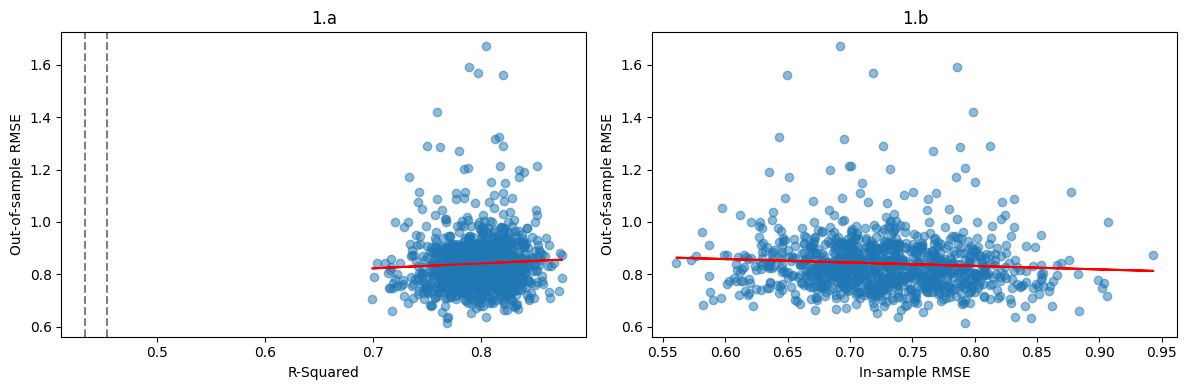

In [543]:
# Calculate the range of OOS-RMSE for models with 0.434 <= R2 <= 0.454
subset = results_df[(results_df["R2"] >= 0.434) & (results_df["R2"] <= 0.454)]
print("OOS-RMSE range for 0.434 <= R2 <= 0.454:", subset["OOS-RMSE"].min(), "-", subset["OOS-RMSE"].max())
print("Number of models in this range:", subset.shape[0])

# Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(results_df["R2"], results_df["OOS-RMSE"], alpha=0.5)
m, b = np.polyfit(results_df["R2"], results_df["OOS-RMSE"], 1)
plt.plot(results_df["R2"], m*results_df["R2"] + b, color='red')
plt.axvline(0.434, linestyle='dashed', color='grey')
plt.axvline(0.454, linestyle='dashed', color='grey')
plt.xlabel("R-Squared")
plt.ylabel("Out-of-sample RMSE")
plt.title("1.a")

plt.subplot(1, 2, 2)
plt.scatter(results_df["IS-RMSE"], results_df["OOS-RMSE"], alpha=0.5)
m2, b2 = np.polyfit(results_df["IS-RMSE"], results_df["OOS-RMSE"], 1)
plt.plot(results_df["IS-RMSE"], m2*results_df["IS-RMSE"] + b2, color='red')
plt.xlabel("In-sample RMSE")
plt.ylabel("Out-of-sample RMSE")
plt.title("1.b")

plt.tight_layout()
plt.show()



Plotting for R² in [0.778, 0.820]


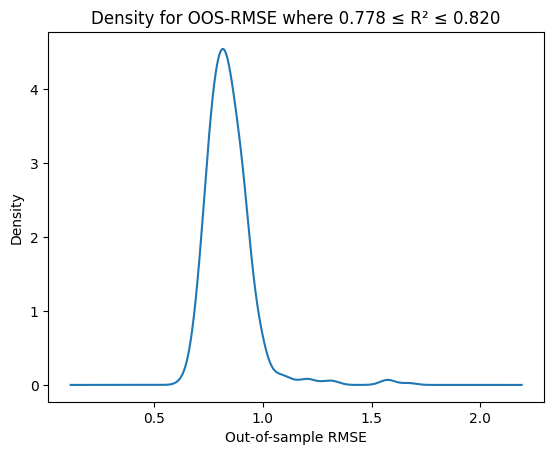

In [544]:
# # Density plot for OOS-RMSE where 0.434 < R2 < 0.454
# plt.figure()
# subset2 = results_df[(results_df["R2"] > 0.434) & (results_df["R2"] < 0.454)]
# subset2["OOS-RMSE"].plot(kind='density')
# plt.xlabel("Out-of-sample RMSE")
# plt.title("")
# plt.show()

r2_lower = results_df["R2"].quantile(0.25)  # 25th percentile
r2_upper = results_df["R2"].quantile(0.75)  # 75th percentile

print(f"Plotting for R² in [{r2_lower:.3f}, {r2_upper:.3f}]")

plt.figure()
subset2 = results_df[(results_df["R2"] >= r2_lower) & (results_df["R2"] <= r2_upper)]
if not subset2.empty:
    subset2["OOS-RMSE"].plot(kind='density')
    plt.xlabel("Out-of-sample RMSE")
    plt.title(f"Density for OOS-RMSE where {r2_lower:.3f} ≤ R² ≤ {r2_upper:.3f}")
    plt.show()
else:
    print(f"No models found with {r2_lower:.3f} ≤ R² ≤ {r2_upper:.3f}. Density plot not shown.")